In [2]:

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

**Monthly Job Postings for Top DataJobs Per Month**

In [13]:
df['month_name']=df['job_posted_date'].dt.month_name()

In [14]:
df=df[df['job_country']=='United States']

In [5]:

top_jobs=df['job_title_short'].value_counts().head(3).index



In [6]:
new_df=df.pivot_table(index='month_name',columns='job_title_short',values='job_title',aggfunc='count')

In [7]:
new_df=new_df.loc[:,top_jobs]

In [8]:
new_df

job_title_short,Data Analyst,Data Scientist,Data Engineer
month_name,,,
April,6049,4867,2801
August,6634,6318,3269
December,3979,3472,2641
February,6124,4956,3060
January,8494,6915,2655
July,5201,4876,2570
June,5683,4645,2893
March,6218,4779,3183
May,4993,4377,2976


<Axes: xlabel='month_name'>

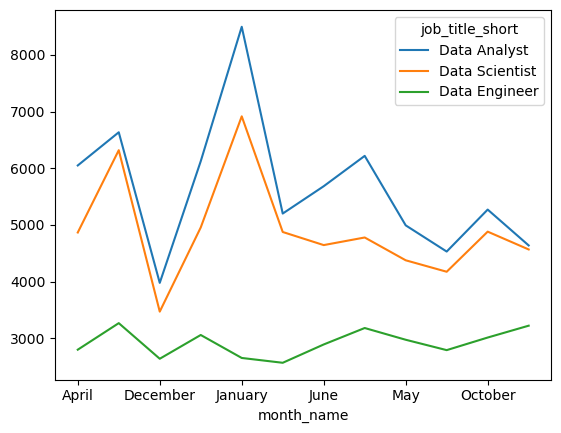

In [9]:
new_df.plot(kind='line')

**To Get the Months In Specific Order**

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
new_df = new_df.reindex(month_order)
new_df

job_title_short,Data Analyst,Data Scientist,Data Engineer
month_name,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4779,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6634,6318,3269
September,4639,4568,3224


Text(0, 0.5, 'Number of Postings')

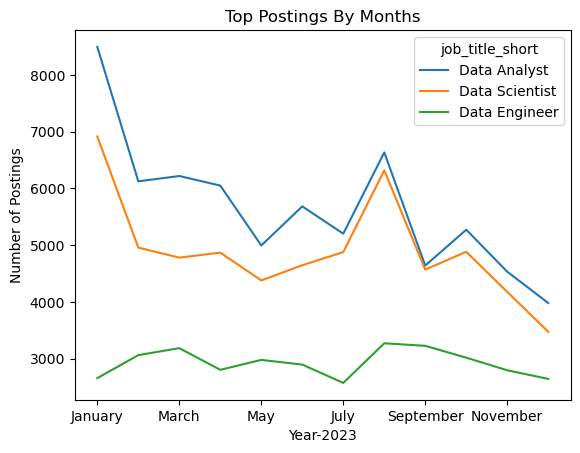

In [12]:
new_df.plot(kind='line')
plt.title('Top Postings By Months')
plt.xlabel('Year-2023')
plt.ylabel('Number of Postings')